# Exploratory Data Analysis (EDA) notebook

## Objectives

- The objective of this EDA is to better understand the cleaned dataset before feature engineering. Specifically, we aim to:

- Examine numerical and categorical feature distributions to identify outliers or imbalances.

- Explore the target variable to check for class balance (classification) or distribution (regression).

- Investigate relationships between features and the target to guide future feature engineering.

## Hypotheses

We propose the following hypotheses to explore during this analysis:

- House Size: Houses with a larger above-ground living area (GrLivArea) tend to have higher sale prices.

- Age of the House: Newer houses tend to have higher sale prices than older houses.

- Houses with higher kitchen quality (KitchenQual) have a higher SalePrice.

These hypotheses will be examined through visualizations, correlations, and summary statistics to inform feature engineering and modeling decisions.


## Inputs

* Cleaned dataset: 
    - `outputs/datasets/cleaned/CleanedData.csv`
* All features and the target variable from this dataset

## Outputs

* Visualizations of numerical feature distributions (histograms, boxplots)
* Visualizations of categorical feature distributions (countplots)
* Target variable distribution plot
* Correlation heatmap of numeric features
* Summary insights to guide feature engineering



---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [12]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\david\\Portfolio 5\\heritage-housing'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [13]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [14]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\david\\Portfolio 5'

In [18]:
import os
os.getcwd()

'c:\\Users\\david\\Portfolio 5'

## Load Cleaned Data

In [23]:
import pandas as pd

df_clean = pd.read_csv(
    'heritage-housing/outputs/datasets/cleaned/CleanedData.csv'
)

TrainSet = df_clean



## Numeric Features: Distribution and Outliers

In this section, we explore the distribution and outliers of all numeric features in the dataset. Histograms help us understand the data distribution, while boxplots highlight potential outliers that may require further investigation."

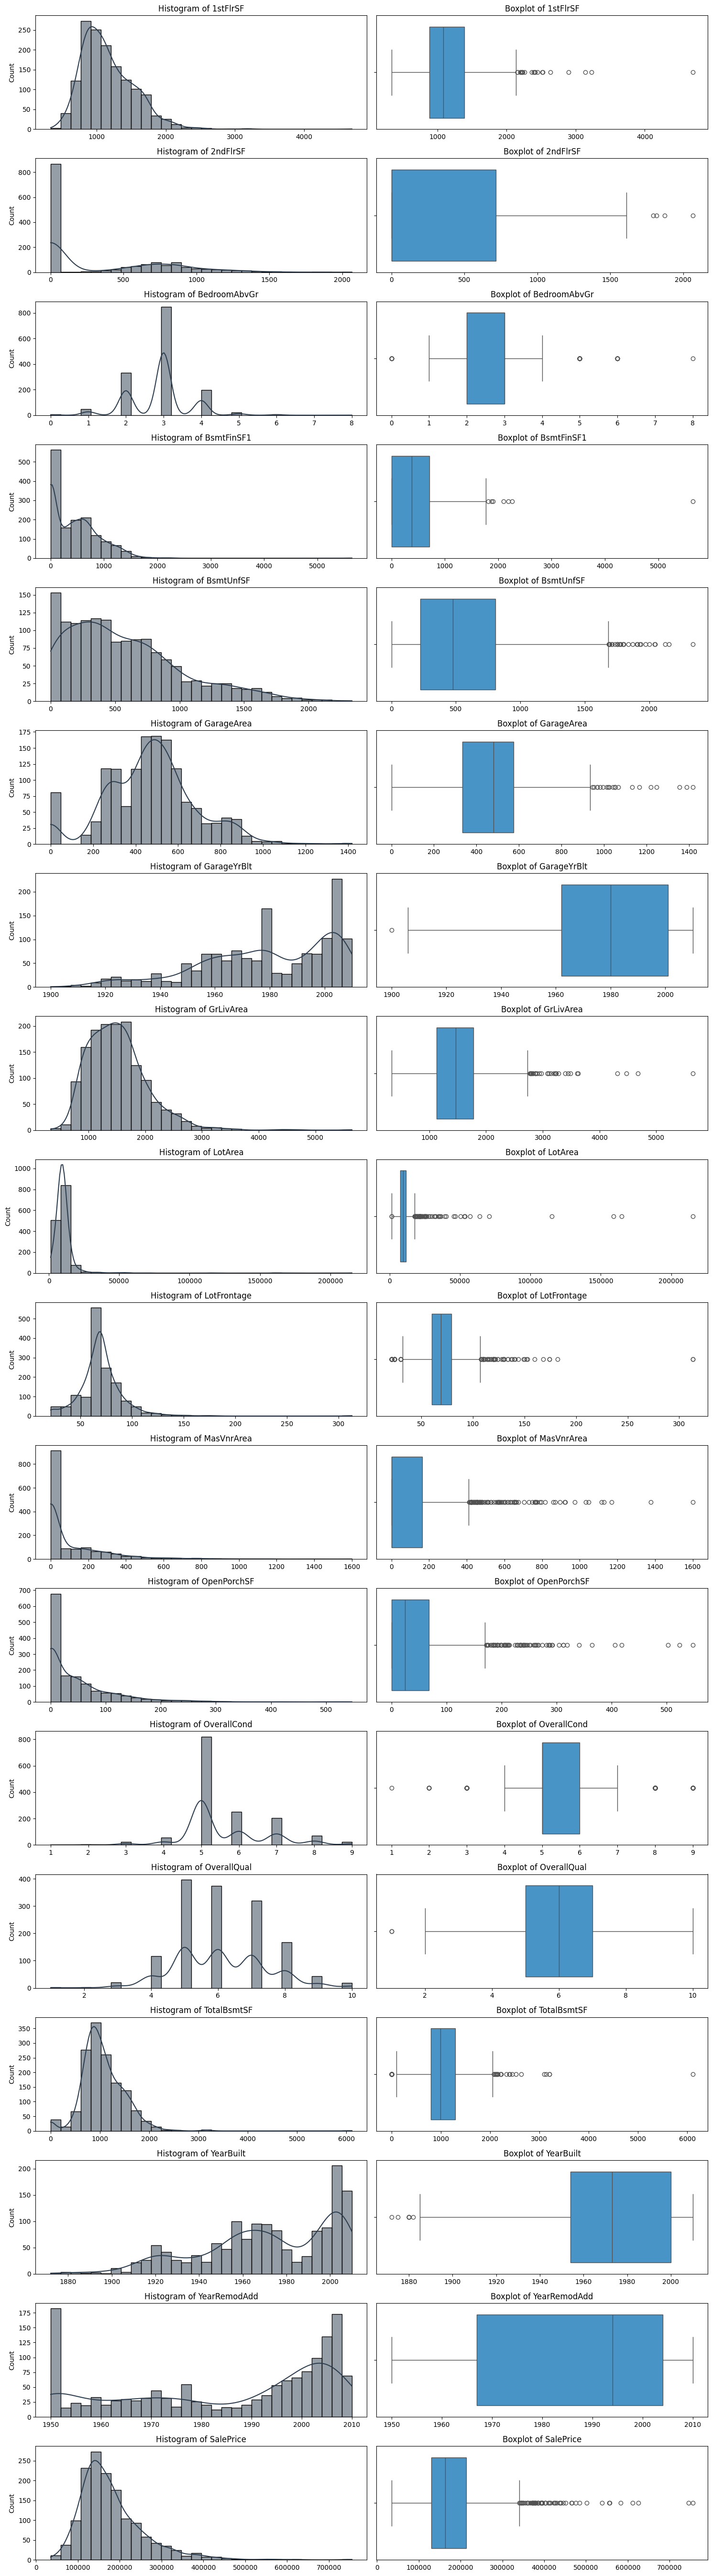

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
num_cols = TrainSet.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set a larger figure size for clarity
plt.figure(figsize=(15, len(num_cols)*3))

for i, col in enumerate(num_cols):
    # Histogram with KDE
    plt.subplot(len(num_cols), 2, 2*i+1)
    sns.histplot(TrainSet[col], kde=True, color='#2c3e50', bins=30)
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')

    # Boxplot for outliers
    plt.subplot(len(num_cols), 2, 2*i+2)
    sns.boxplot(x=TrainSet[col], color='#3498db')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel('')

plt.tight_layout()
plt.show()


---

## Categorical Features

### Categorical Features: Counts

C:\Users\david\AppData\Local\Temp\ipykernel_11588\2791678769.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=TrainSet[col], palette='viridis', order=TrainSet[col].value_counts().index)
C:\Users\david\AppData\Local\Temp\ipykernel_11588\2791678769.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=TrainSet[col], palette='viridis', order=TrainSet[col].value_counts().index)
C:\Users\david\AppData\Local\Temp\ipykernel_11588\2791678769.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=TrainSet[col], palette='viridis', order=Trai

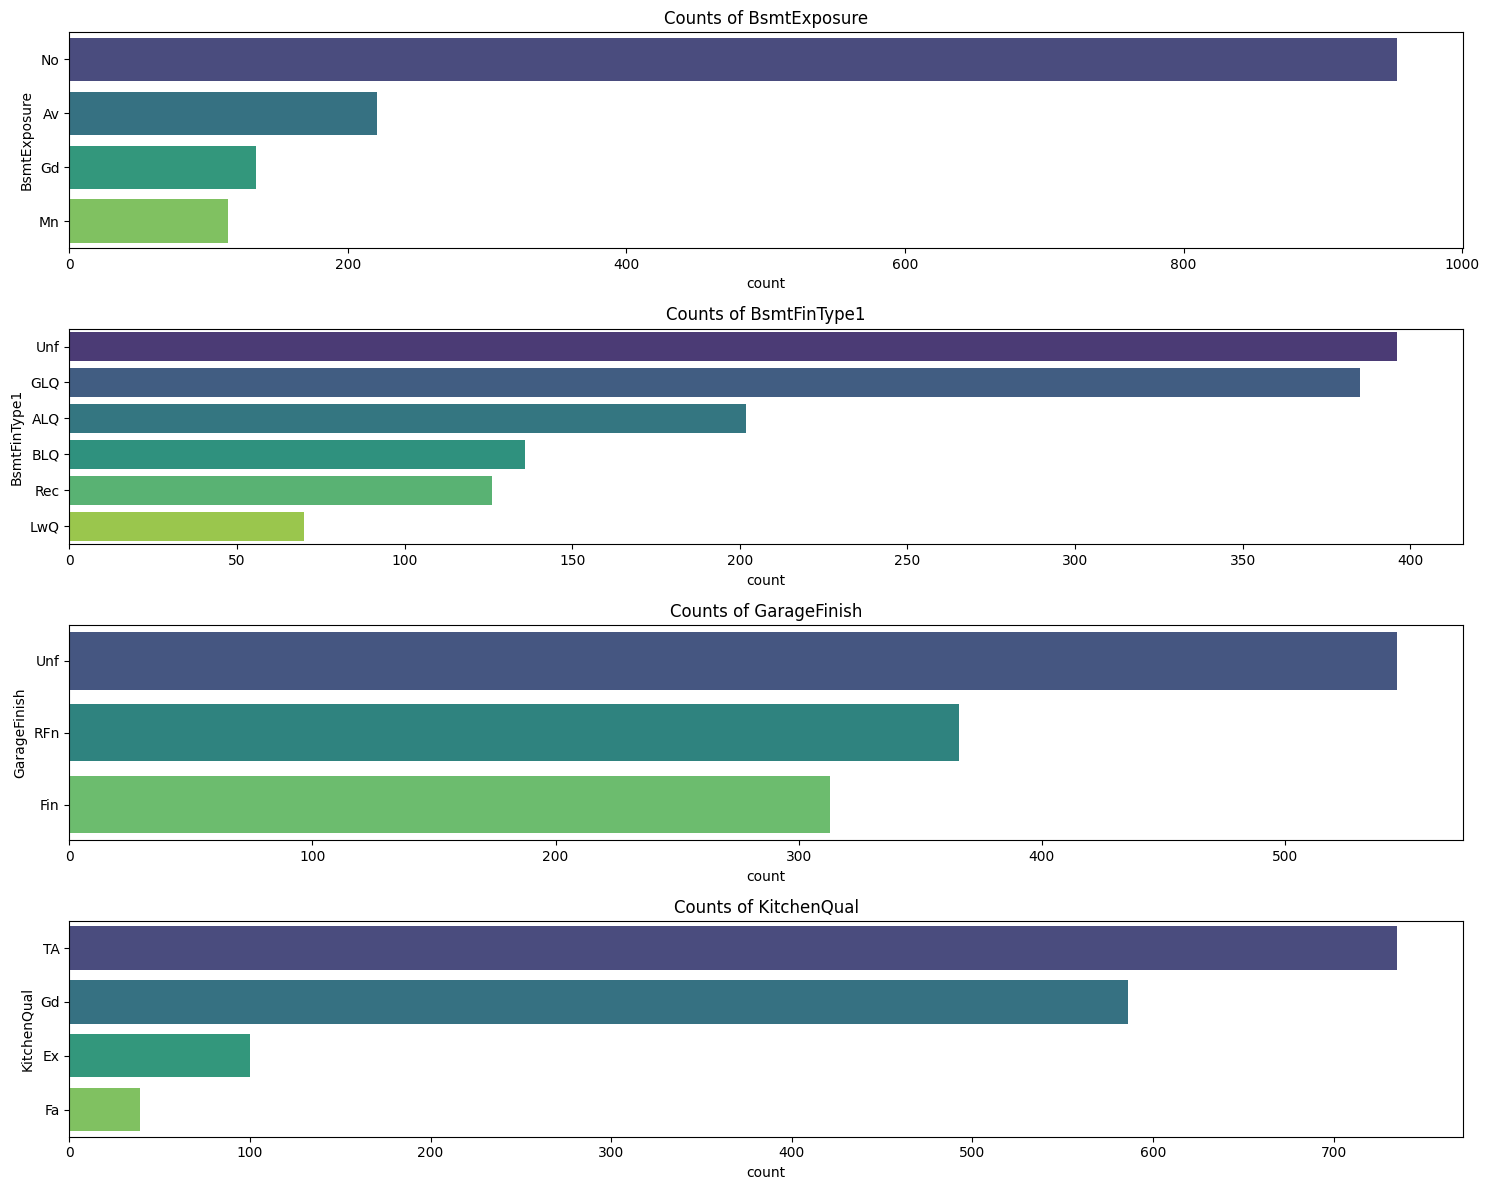

In [ ]:
# Select categorical columns
cat_cols = TrainSet.select_dtypes(include=['object', 'category']).columns.tolist()

plt.figure(figsize=(15, len(cat_cols)*3))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols), 1, i+1)
    sns.countplot(y=TrainSet[col], palette='viridis', order=TrainSet[col].value_counts().index)
    plt.title(f'Counts of {col}')

plt.tight_layout()
plt.show()


## Categorical Features vs SalePrice

We examine how the categorical feature `KitchenQual` (kitchen quality) affects the target variable `SalePrice`.


In [ ]:
# Median SalePrice by KitchenQual
median_prices = df_clean.groupby('KitchenQual')['SalePrice'].median().reset_index()
median_prices.rename(columns={'SalePrice': 'MedianSalePrice'}, inplace=True)
print("Median SalePrice by Kitchen Quality (encoded):")
print(median_prices)


Median SalePrice by Kitchen Quality (encoded):
  KitchenQual  MedianSalePrice
0          Ex         316750.0
1          Fa         115000.0
2          Gd         201400.0
3          TA         137000.0


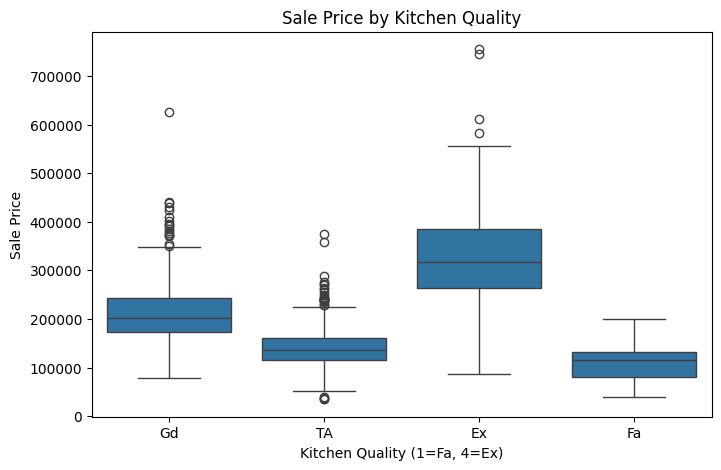

In [ ]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='KitchenQual', y='SalePrice', data=df_clean)
plt.xlabel('Kitchen Quality (1=Fa, 4=Ex)')
plt.ylabel('Sale Price')
plt.title('Sale Price by Kitchen Quality')
plt.show()

### Target Variable Distribution

We examine the distribution of the target variable, SalePrice. Visualizing its counts helps us understand class balance, which is important for model performance and evaluation.

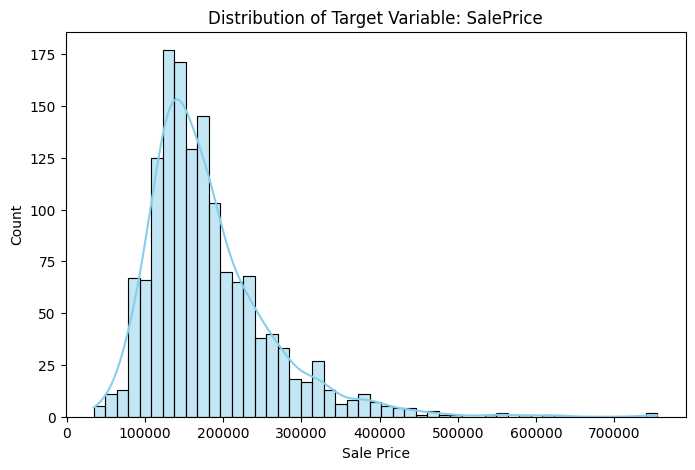

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(TrainSet['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of Target Variable: SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()


In [ ]:
print(TrainSet['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


### Correlations

We examine how numerical features relate to each other and to the target variable, SalePrice. Correlation analysis helps identify which features may be strong predictors for regression modeling.

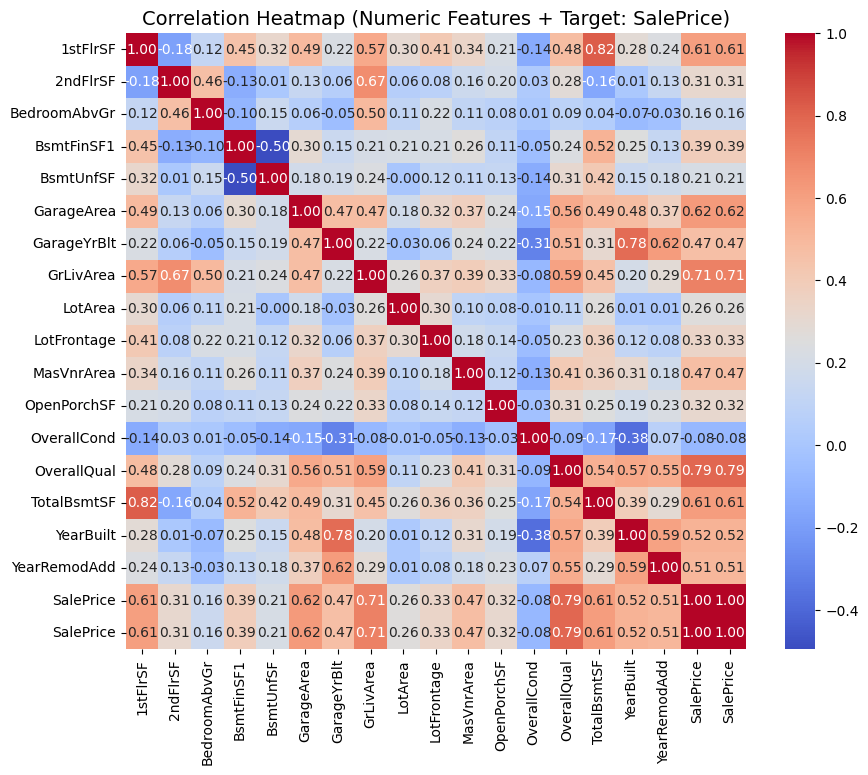

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
LotFrontage     0.334771
OpenPorchSF     0.315856
2ndFlrSF        0.312479
LotArea         0.263843
BsmtUnfSF       0.214479
BedroomAbvGr    0.155784
OverallCond    -0.077856
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = TrainSet.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(10,8))
sns.heatmap(
    TrainSet[num_cols + ['SalePrice']].corr(),  # include SalePrice as target
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True
)
plt.title("Correlation Heatmap (Numeric Features + Target: SalePrice)", fontsize=14)
plt.show()

# Correlation of numeric features with SalePrice
corr_with_target = (
    TrainSet[num_cols]
    .corrwith(TrainSet['SalePrice'])
    .sort_values(ascending=False)
)

print(corr_with_target)



### Conclusions


## Findings vs. Hypotheses

| Hypothesis | Finding | Supported? |
|-----------|---------|------------|
| House Size: Larger living area leads to higher SalePrice | GrLivArea shows a strong positive correlation with SalePrice (ρ ≈ 0.71) | Yes |
| Age of the House: Newer houses sell for more | YearBuilt and YearRemodAdd show moderate positive correlations with SalePrice (ρ ≈ 0.52 and 0.51) | Partially |
| Kitchen Quality: Houses with better kitchens sell for more | Median SalePrice increases with KitchenQual: Fa = 115,000; TA = 137,000; Gd = 201,400; Ex = 316,750 | Yes |




- Overall, the exploratory data analysis highlights several strong relationships between features and the target variable, SalePrice.
Both linear and monotonic correlation analyses identify key numeric predictors.
The target variable exhibits right skewness, suggesting the need for transformation prior to modeling. Additionally, categorical features show imbalance and meaningful “None” categories, informing encoding and feature engineering decisions. These findings guide the next steps of feature engineering and model development.